In [140]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from io import BytesIO
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation
from keras.regularizers import L1L2
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [63]:
uploaded = files.upload()

Saving bonum.csv to bonum (1).csv


In [64]:
df = pd.read_csv(BytesIO(uploaded['bonum.csv']))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  5090 non-null   int64
 1   Price   5090 non-null   int64
 2   Num     5090 non-null   int64
dtypes: int64(3)
memory usage: 119.4 KB


In [ ]:
#df.drop(columns=["Num"],inplace=True)

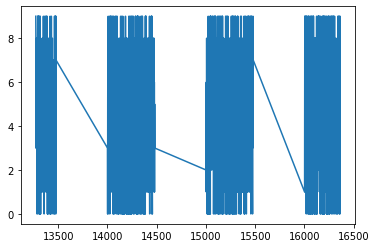

In [ ]:
period = df["Period"].values
period = np.mod(period,100000)
num = df["Num"].values
plt.plot(period,num)
plt.show()


In [ ]:
num = num.reshape((-1,1))
split = int(0.80*len(num))
train_x = num[:split]
test_x = num[split:]
print("shape of train_x :::",train_x.shape)
print("shape of test_x :::",test_x.shape)

shape of train_x ::: (1224, 1)
shape of test_x ::: (306, 1)


In [ ]:
look_back = 10
train_generator = TimeseriesGenerator(train_x, train_x, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(test_x, test_x, length=look_back, batch_size=1)


In [ ]:
model = Sequential()
model.add(LSTM(10,activation="relu",input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit_generator(train_generator, epochs=25, verbose=1)

Epoch 1/25
61/61 [==============================] - 0s 4ms/step - loss: 29.4761
Epoch 2/25
61/61 [==============================] - 0s 5ms/step - loss: 27.6503
Epoch 3/25
61/61 [==============================] - 0s 5ms/step - loss: 23.0817
Epoch 4/25
61/61 [==============================] - 0s 5ms/step - loss: 9.0491
Epoch 5/25
61/61 [==============================] - 0s 4ms/step - loss: 9.0226
Epoch 6/25
61/61 [==============================] - 0s 4ms/step - loss: 8.8922
Epoch 7/25
61/61 [==============================] - 0s 5ms/step - loss: 9.0983
Epoch 8/25
61/61 [==============================] - 0s 4ms/step - loss: 8.7633
Epoch 9/25
61/61 [==============================] - 0s 4ms/step - loss: 8.7061
Epoch 10/25
61/61 [==============================] - 0s 5ms/step - loss: 8.6784
Epoch 11/25
61/61 [==============================] - 0s 5ms/step - loss: 8.6631
Epoch 12/25
61/61 [==============================] - 0s 4ms/step - loss: 8.6943
Epoch 13/25
61/61 [===========================

In [ ]:
prediction = model.predict(test_generator)

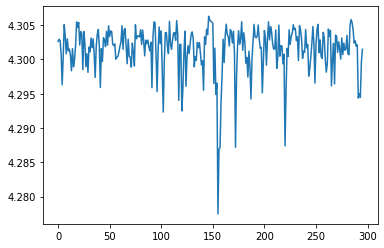

In [ ]:
plt.plot(prediction)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  2530 non-null   int64
 1   Price   2530 non-null   int64
 2   Num     2530 non-null   int64
dtypes: int64(3)
memory usage: 59.4 KB


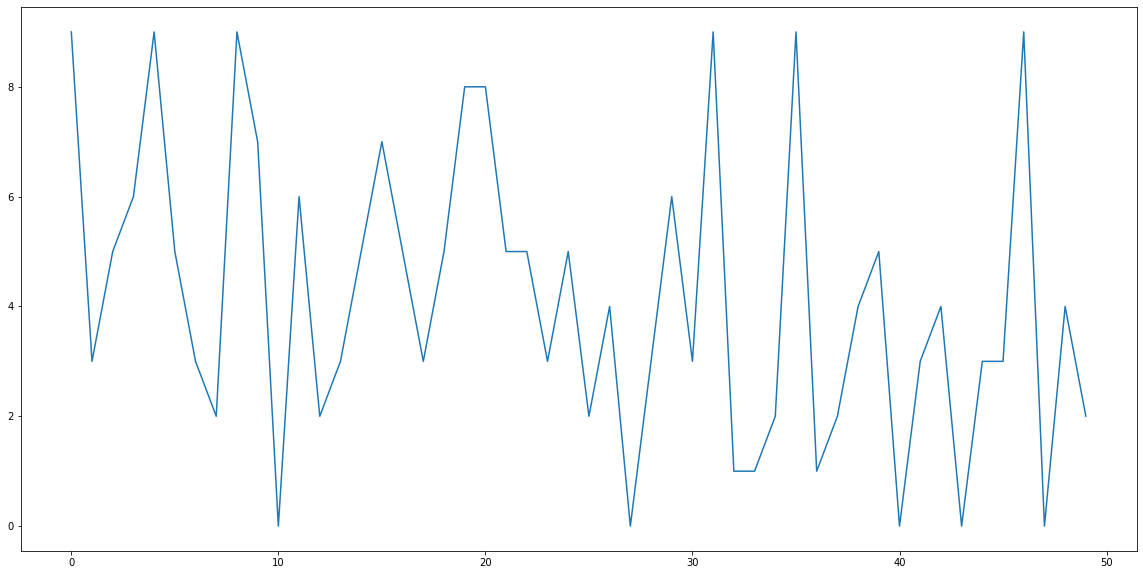

In [66]:
data = df['Num'].values
plt.plot(data[:50])
plt.show()

In [67]:
data = data[::-1]
data = np.reshape(data,(data.shape[0],1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [68]:
data = np.reshape(data,(data.shape[0],1))

In [69]:
dataset = data/10
np.unique(dataset)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [70]:
split = int(0.85*len(dataset))
train = dataset[:split,:]
test = dataset[split:,:]
print(len(train),len(test))

4326 764


In [71]:
def create_lookBack(data,look_back = 3):
  val_x = []
  val_y = []
  for i in range(len(data)-look_back-1):
    val_x.append(data[i:(i+look_back),0])
    val_y.append(data[i+look_back,0])
  return np.array(val_x),np.array(val_y)  

In [150]:
np.random.seed(7)
data = df['Num'].values
data = data.astype("float32")
data = data.reshape((-1,1))
data = data[::-1]
dataset = data/10
np.unique(dataset)
split = int(0.85*len(dataset))
train = dataset[:split,:]
test = dataset[split:,:]
print(len(train),len(test))

4326 764


In [151]:
look_back = 10
train_x,train_y = create_lookBack(train,look_back)
test_x,test_y = create_lookBack(test,look_back)

In [152]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [153]:
reg = L1L2(l1=0.01, l2=0.01)
model = Sequential()
model.add(LSTM(200, input_shape=(1, look_back),return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(200,return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(100,return_sequences = False,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [139]:
model = Sequential()
model.add(LSTM(200,input_shape = (1, look_back), return_sequences = True,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(100,return_sequences = True,activation="relu"))
model.add(Dropout(0.35))
model.add(LSTM(100,return_sequences = False,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

NameError: ignored

In [154]:
model.fit(train_x,train_y,epochs = 450,verbose=2,batch_size=1024, shuffle=False)

Epoch 1/450
5/5 - 0s - loss: 10.2593
Epoch 2/450
5/5 - 0s - loss: 10.1684
Epoch 3/450
5/5 - 0s - loss: 10.0679
Epoch 4/450
5/5 - 0s - loss: 9.9517
Epoch 5/450
5/5 - 0s - loss: 9.8195
Epoch 6/450
5/5 - 0s - loss: 9.7168
Epoch 7/450
5/5 - 0s - loss: 9.6507
Epoch 8/450
5/5 - 0s - loss: 9.5653
Epoch 9/450
5/5 - 0s - loss: 9.4951
Epoch 10/450
5/5 - 0s - loss: 9.4184
Epoch 11/450
5/5 - 0s - loss: 9.3443
Epoch 12/450
5/5 - 0s - loss: 9.2740
Epoch 13/450
5/5 - 0s - loss: 9.1999
Epoch 14/450
5/5 - 0s - loss: 9.1293
Epoch 15/450
5/5 - 0s - loss: 9.0570
Epoch 16/450
5/5 - 0s - loss: 8.9867
Epoch 17/450
5/5 - 0s - loss: 8.9149
Epoch 18/450
5/5 - 0s - loss: 8.8453
Epoch 19/450
5/5 - 0s - loss: 8.7752
Epoch 20/450
5/5 - 0s - loss: 8.7068
Epoch 21/450
5/5 - 0s - loss: 8.6371
Epoch 22/450
5/5 - 0s - loss: 8.5696
Epoch 23/450
5/5 - 0s - loss: 8.5004
Epoch 24/450
5/5 - 0s - loss: 8.4335
Epoch 25/450
5/5 - 0s - loss: 8.3664
Epoch 26/450
5/5 - 0s - loss: 8.2998
Epoch 27/450
5/5 - 0s - loss: 8.2335
Epoch 2

In [155]:
trainPredict = model.predict(train_x)
testPredict = model.predict(test_x)

In [156]:
len(np.unique(testPredict))

753

In [157]:
trainPredict = np.reshape(trainPredict,(trainPredict.shape[0],1))
testPredict = np.reshape(testPredict,(testPredict.shape[0],1))
trainPredict.shape

(4315, 1)

In [158]:
import math
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.52 RMSE
Test Score: 2.61 RMSE


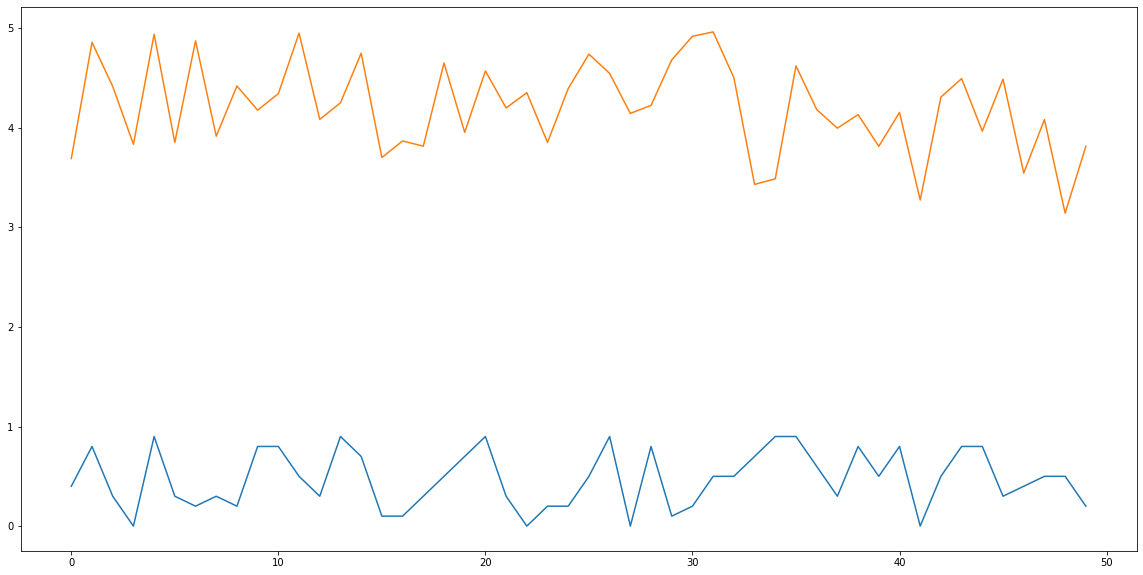

<Figure size 1440x720 with 0 Axes>

In [159]:
train_plot = [(i,j) for i,j in zip(train_y[:50],trainPredict[:50])]

plt.plot(train_plot)
plt.figure(figsize=(20,10))
plt.show()

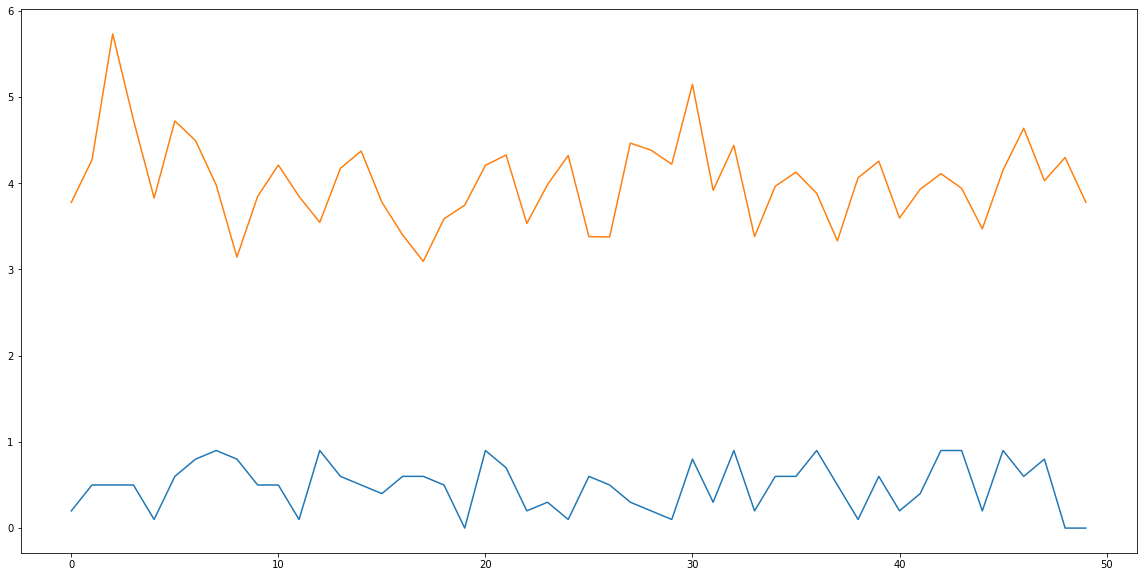

In [129]:
train_plot = [(i,j) for i,j in zip(test_y[:50],testPredict[:50])]

plt.plot(train_plot)
plt.show()

In [ ]:
test_x.shape

(369, 1, 10)

In [ ]:
val_x = [4,6,3,8,2]
val_x = val_x[::-1]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,5))

In [ ]:
val = np.squeeze(np.round(model.predict(val_x)*10))
print("red" if val%2==0 else "green")

green


In [ ]:
model.predict(val_x)

array([[0.47765648]], dtype=float32)

In [ ]:
val_x = [9,4,9,9,4,1,7,7,4,2]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,10))

In [ ]:
np.unique(testPredict)

array([-4.511395  , -2.1692955 , -1.5648576 , -0.51119757, -0.03092493,
        0.05258471,  0.17721583,  0.27523306,  0.2937835 ,  0.60842395,
        0.6136371 ,  0.6233368 ,  0.8159661 ,  1.058811  ,  1.1260105 ,
        1.1533082 ,  1.216738  ,  1.2772435 ,  1.2964182 ,  1.4947896 ,
        1.5454955 ,  1.6657078 ,  1.8188089 ,  1.8425233 ,  1.8634242 ,
        1.8759334 ,  1.918032  ,  2.0664303 ,  2.1613908 ,  2.1928415 ,
        2.2333062 ,  2.2915623 ,  2.309398  ,  2.3265326 ,  2.3334408 ,
        2.3445706 ,  2.366714  ,  2.3735456 ,  2.4140394 ,  2.4373622 ,
        2.4500513 ,  2.475035  ,  2.4782856 ,  2.4872632 ,  2.496115  ,
        2.5094445 ,  2.6143792 ,  2.6418307 ,  2.6540146 ,  2.6713297 ,
        2.7174911 ,  2.7247188 ,  2.745253  ,  2.7457535 ,  2.7866454 ,
        2.788039  ,  2.8248177 ,  2.8358796 ,  2.8655057 ,  2.9190266 ,
        2.9196975 ,  2.942189  ,  2.9853709 ,  2.9883218 ,  3.0044785 ,
        3.0134025 ,  3.0159743 ,  3.0563178 ,  3.0678978 ,  3.10